In [1]:
import numpy as np
import matplotlib.pyplot as plt

Plot some examples of the latent 2D space.

In [2]:
def plot_latent_space(x):
    b = x.reshape(-1, 28, 28)
    canvas = np.empty((28 * 21, 28 * 21))

    plt.figure(figsize=(10,10))

    for j in range(21):
        for i in range(21):
            canvas[j * 28:(j + 1) * 28, i * 28:(i + 1) * 28] = b[i + 21 * j]

    plt.imshow(canvas)
    plt.show()
    
def plot_distribution(dta):
    plt.figure(figsize=(10,10))

    for label in range(10):
        indices = np.where(dta[:,0] == float(label))
        plt.scatter(dta[indices, 1], dta[indices, 2], label=label)
    plt.legend()
    plt.show()

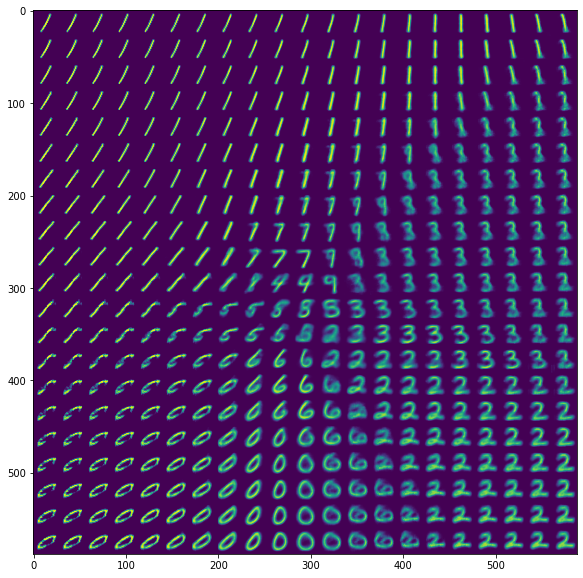

In [3]:
plot_latent_space(np.loadtxt("latent_space_beta_0.txt"))

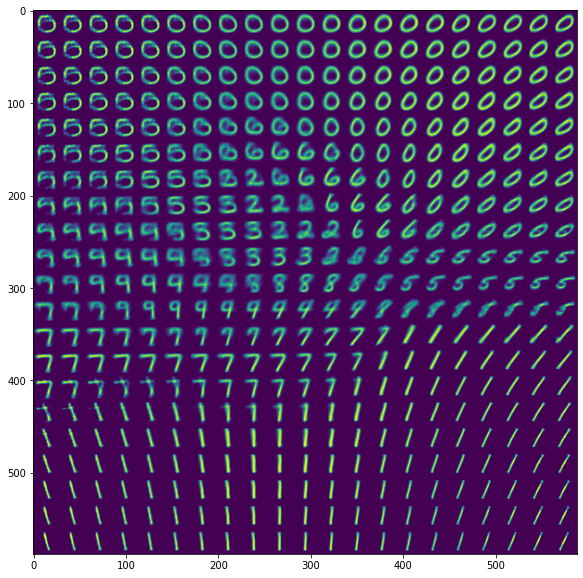

In [4]:
plot_latent_space(np.loadtxt("latent_space_beta_1.txt"))

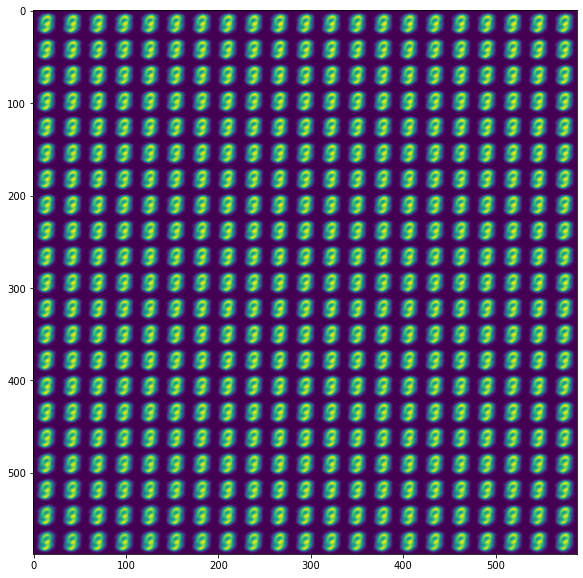

In [5]:
plot_latent_space(np.loadtxt("latent_space_beta_4.txt"))

The last latent space does not look good. To better understand why, let's take a look at distributions.

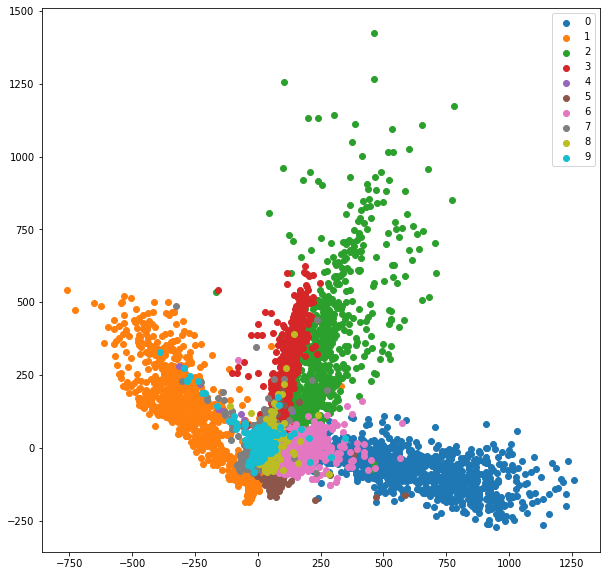

In [6]:
plot_distribution(np.loadtxt("VAE-CNN-beta_0.log"))

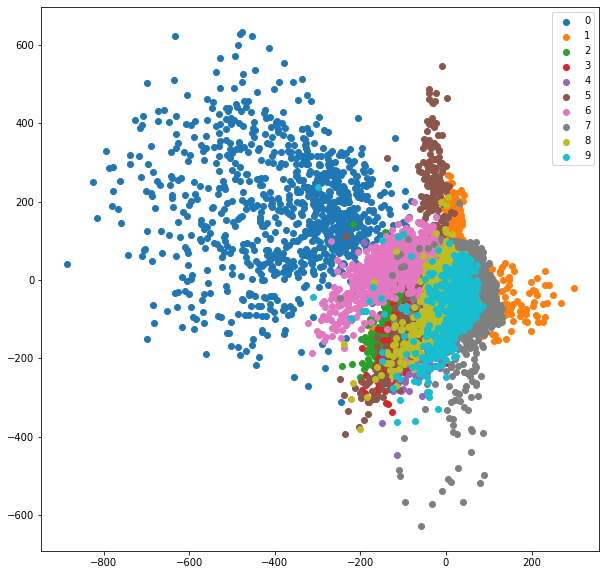

In [7]:
plot_distribution(np.loadtxt("VAE-CNN-beta_1.log"))

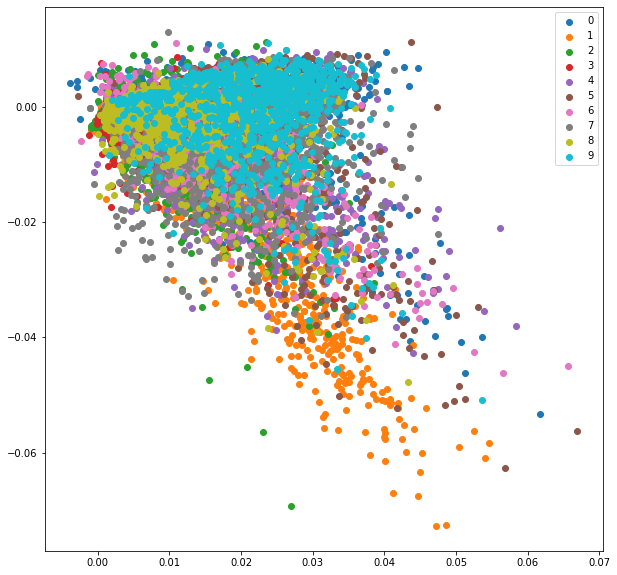

In [8]:
plot_distribution(np.loadtxt("VAE-CNN-beta_4.log"))

Now, we see that the distributions overlap. This explains the picture we have seen before.
We can tell that $\beta=4$ was too large parameter value for the given architecture.
After all, $\beta$ is a hyperparameter and it is meant to be optimized individually for each configuration.